<a href="https://colab.research.google.com/github/nurenshababa/nuren-shababa/blob/main/Energy_Efficiency_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset used is the Energy Efficiency Dataset (ENB2012), which contains simulated building data used to study how different building design parameters affect energy consumption.

Source: UCI Machine Learning Repository

Observations: 768 buildings

Features: 8 building characteristics

Targets: Heating Load (Y1), Cooling Load (Y2). However, this model refrains from using Y2 since Y1 and Y2 are highly correlated and can cause redundancy in the model

#Analytical Framing
Type : Regression
Target Variable : Y1 - Heating Load
Predictor Variables : X1 -X8

#Feature	Description
X1	Relative Compactness
X2	Surface Area
X3	Wall Area
X4	Roof Area
X5	Overall Height
X6	Orientation
X7	Glazing Area
X8	Glazing Area Distribution


#Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
# Load dataset
df = pd.read_csv("ENB2012_data.csv")

df.head()


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


#Data Information and Description

In [3]:
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
df.info()

df.describe().T



Shape: (768, 10)

Columns: ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


,count,mean,std,min,25%,50%,75%,max
X1,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
X2,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
X3,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
X4,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
X5,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
X6,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
X7,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
X8,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Y1,768.0,22.307201,10.090196,6.01,12.9925,18.95,31.6675,43.10
Y2,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


In [4]:
eda_stats = pd.DataFrame({
    "Mean": df.mean(),
    "Median": df.median(),
    "Mode": df.mode().iloc[0],
    "Variance": df.var(),
    "Std Dev": df.std(),
    "Min": df.min(),
    "Max": df.max(),
    "Range": df.max() - df.min(),
    "Skewness": df.skew(),
    "Kurtosis": df.kurtosis()
})
eda_stats


,Mean,Median,Mode,Variance,Std Dev,Min,Max,Range,Skewness,Kurtosis
X1,0.764167,0.75,0.62,0.011189,0.105777,0.62,0.98,0.36,0.495513,-0.706568
X2,671.708333,673.75,514.50,7759.163842,88.086116,514.50,808.50,294.00,-0.125131,-1.059454
X3,318.500000,318.50,294.00,1903.269883,43.626481,245.00,416.50,171.50,0.533417,0.116593
X4,176.604167,183.75,220.50,2039.963060,45.165950,110.25,220.50,110.25,-0.162764,-1.776947
X5,5.250000,5.25,3.50,3.066493,1.751140,3.50,7.00,3.50,0.000000,-2.005229
X6,3.500000,3.50,2.00,1.251630,1.118763,2.00,5.00,3.00,0.000000,-1.361042
X7,0.234375,0.25,0.10,0.017748,0.133221,0.00,0.40,0.40,-0.060254,-1.327629
X8,2.812500,3.00,1.00,2.405476,1.550960,0.00,5.00,5.00,-0.088689,-1.148709
Y1,22.307201,18.95,15.16,101.812050,10.090196,6.01,43.10,37.09,0.360449,-1.245572
Y2,24.587760,22.08,14.27,90.502983,9.513306,10.90,48.03,37.13,0.395992,-1.147190


In [5]:
df[['Y1', 'Y2']].corr()


,Y1,Y2
Y1,1.000000,0.975862
Y2,0.975862,1.000000


#**DATA PREPROCESSING**

In [6]:
# Missing values
print("Total missing values:", df.isna().sum().sum())
print(df.isna().sum())

# Duplicates
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)

# If duplicates exist, remove them
df = df.drop_duplicates()
print("New shape after drop_duplicates:", df.shape)


Total missing values: 0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64
Duplicate rows: 0
New shape after drop_duplicates: (768, 10)


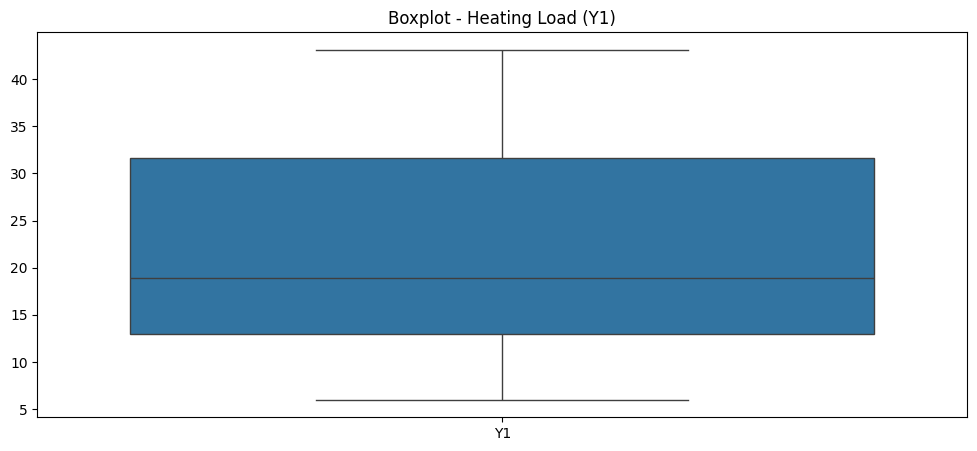

,0
X1,0
X2,0
X3,0
X4,0
X5,0
X6,0
X7,0
X8,0
Y1,0
Y2,0


In [7]:
numeric_cols = df.columns.tolist()

# Boxplots for quick outlier scan
plt.figure(figsize=(12,5))
sns.boxplot(data=df[['Y1']])
plt.title("Boxplot - Heating Load (Y1)")
plt.show()

def iqr_outlier_summary(dataframe, cols):
    summary = {}
    for c in cols:
        q1 = dataframe[c].quantile(0.25)
        q3 = dataframe[c].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        outliers = ((dataframe[c] < lower) | (dataframe[c] > upper)).sum()
        summary[c] = int(outliers)
    return pd.Series(summary).sort_values(ascending=False)

iqr_outlier_summary(df, numeric_cols)


#EXPLORATORY DATA ANALYSIS

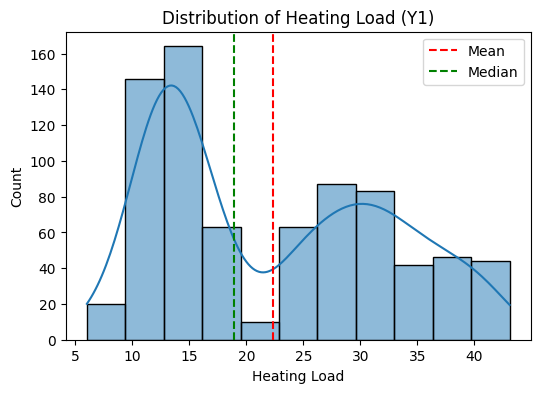

In [8]:
#target variable distribution
plt.figure(figsize=(6,4))
sns.histplot(df["Y1"], kde=True)
plt.axvline(df["Y1"].mean(), color="red", linestyle="--", label="Mean")
plt.axvline(df["Y1"].median(), color="green", linestyle="--", label="Median")
plt.title("Distribution of Heating Load (Y1)")
plt.xlabel("Heating Load")
plt.legend()
plt.show()


Heating load shows a bimodal, right-skewed distribution, indicating heterogenous building energy requirements

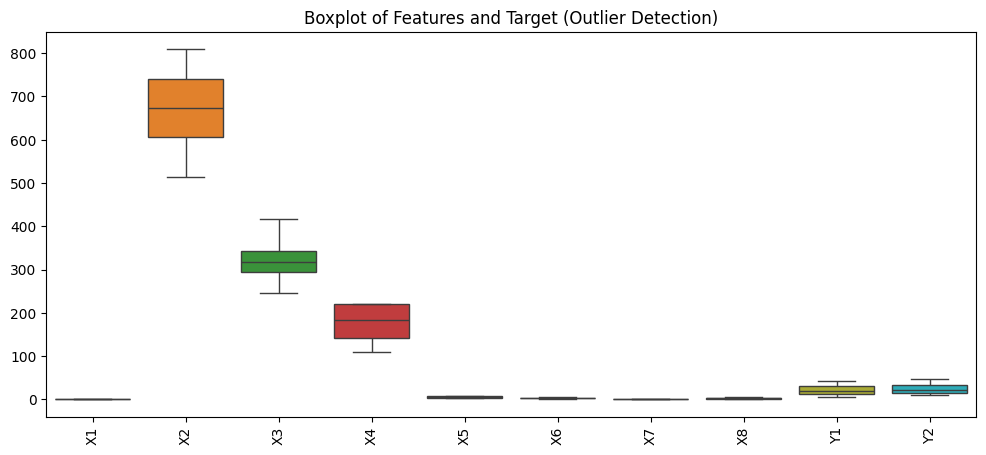

In [9]:
#Outlier detection
plt.figure(figsize=(12,5))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot of Features and Target (Outlier Detection)")
plt.show()


Boxplots reveal variability differences across features with no critical outliers affecting the dataset

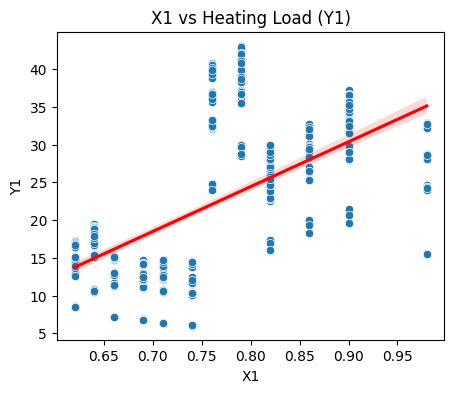

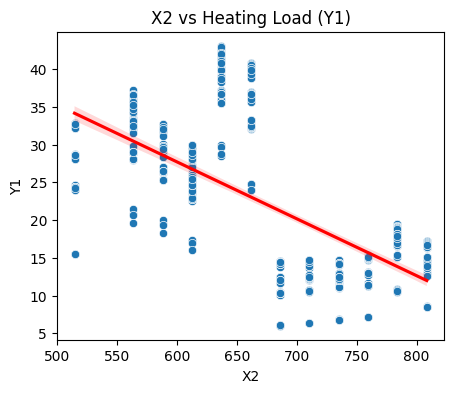

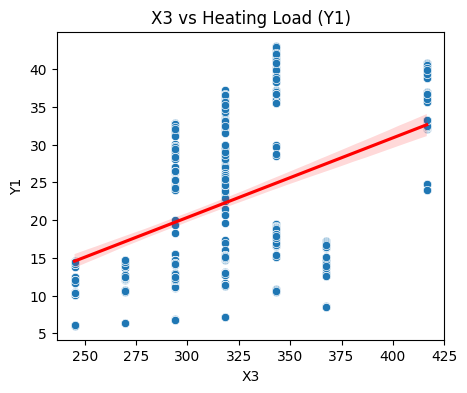

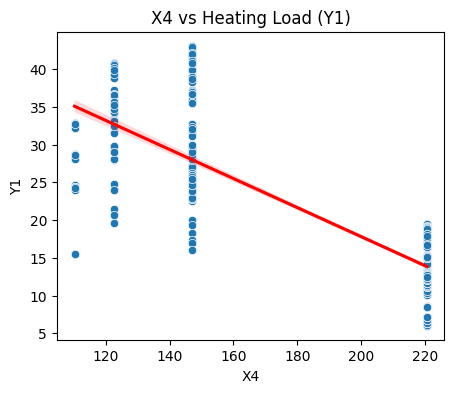

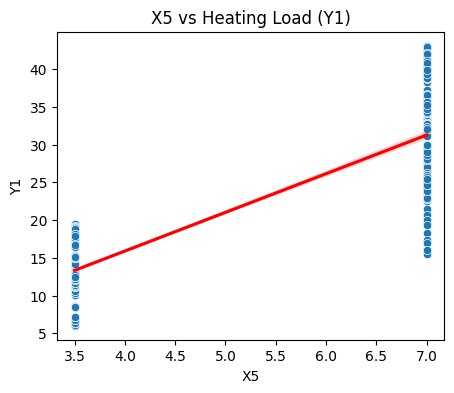

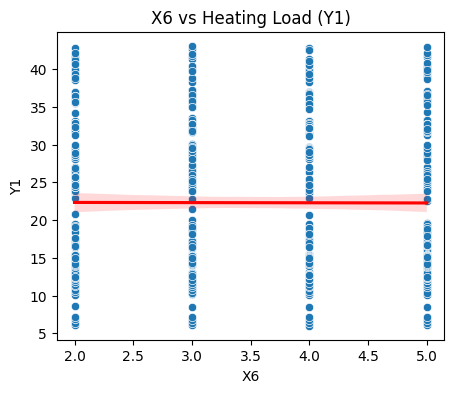

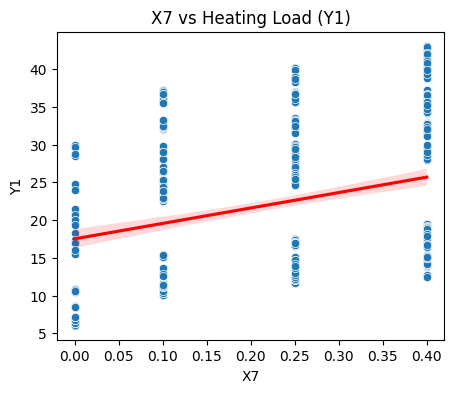

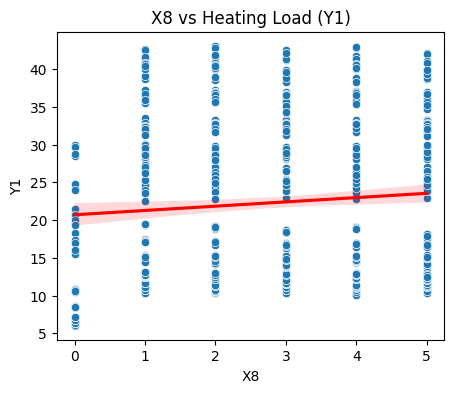

In [10]:
#feature vs target variable relationship visualisation
num_features = df.drop(columns=["Y1", "Y2"]).columns

for col in num_features:
    plt.figure(figsize=(5,4))
    sns.scatterplot(x=df[col], y=df["Y1"])
    sns.regplot(x=df[col], y=df["Y1"], scatter=False, color="red")
    plt.title(f"{col} vs Heating Load (Y1)")
    plt.show()

| **Variable**              | **Correlation with Heating Load (Y1)** |
| ------------------------- | -------------------------------------- |
| Relative Compactness      | Positive                               |
| Surface Area              | Negative                               |
| Wall Area                 | Positive                               |
| Roof Area                 | Negative                               |
| Overall Height            | Positive                               |
| Orientation               | No significant correlation             |
| Glazing Area              | Positive                               |
| Glazing Area Distribution | Positive                               |


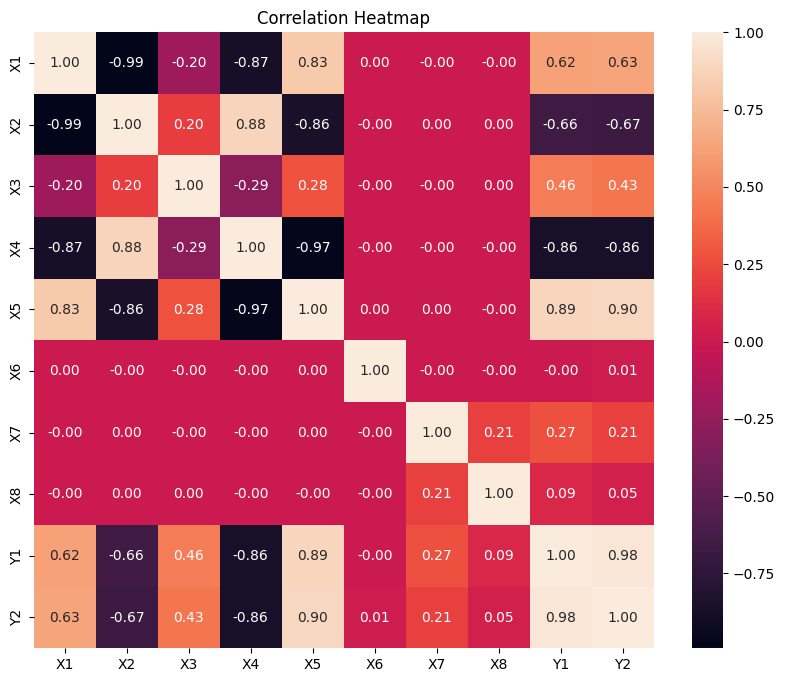

In [11]:
#correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


#Split the Data

In [12]:
from sklearn.compose import ColumnTransformer

In [13]:
X = df.drop(columns=["Y1", "Y2"], errors="ignore")
y = df["Y1"]  # Regression target: Heating Load

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (614, 8) Test shape: (154, 8)


#Scale the Data

In [14]:
#define features and target
X = df.drop(columns=["Y1", "Y2"], errors="ignore")
y = df["Y1"]


In [15]:
#define numeric and categorical columns
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(exclude=["int64", "float64"]).columns.tolist()

print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)

Numeric columns: ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']
Categorical columns: []


#FEATURE SELECTION

In [16]:
from sklearn.feature_selection import SelectKBest, f_regression

In [17]:
#define x/y
X = df.drop(columns=["Y1", "Y2"])
y = df["Y1"]


In [18]:
selector = SelectKBest(score_func=f_regression, k="all")
selector.fit(X, y)


SelectKBest(k='all', score_func=<function f_regression at 0x7ad9948ab880>)

In [19]:
feature_scores = pd.DataFrame({
    "Feature": X.columns,
    "F_Score": selector.scores_
}).sort_values(by="F_Score", ascending=False)

feature_scores


,Feature,F_Score
4,X5,2900.596724
3,X4,2211.624329
1,X2,585.261320
0,X1,484.046234
2,X3,200.727661
6,X7,60.155847
7,X8,5.891926
5,X6,0.005125


#Interpretation of the results
| Feature | F_Score | Interpretation                                                    |
| ------- | ------- | ----------------------------------------------------------------- |
| X5      | 2900.60 | **Most important** → Overall Height strongly affects Heating Load |
| X4      | 2211.62 | Roof Area is also highly influential                              |
| X2      | 585.26  | Surface Area moderately important                                 |
| X1      | 484.05  | Relative Compactness contributes moderately                       |
| X3      | 200.73  | Wall Area has some effect                                         |
| X7      | 60.16   | Glazing Area has minor effect                                     |
| X8      | 5.89    | Glazing Distribution negligible                                   |
| X6      | 0.005   | Orientation almost irrelevant                                     |


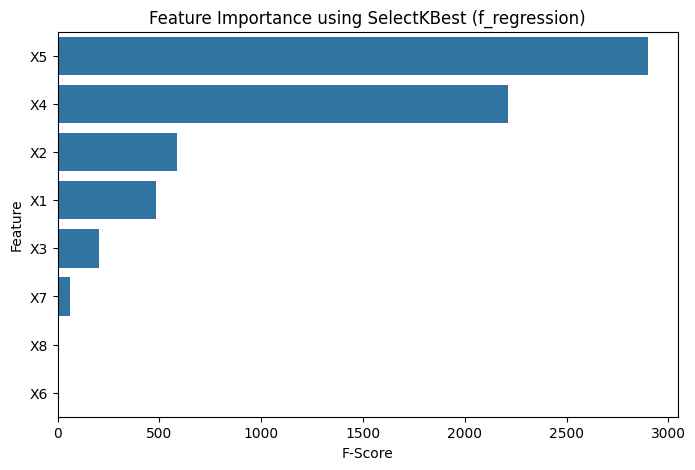

In [20]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=feature_scores,
    x="F_Score",
    y="Feature"
)
plt.title("Feature Importance using SelectKBest (f_regression)")
plt.xlabel("F-Score")
plt.ylabel("Feature")
plt.show()


#MODEL BUILDING

In [21]:
#define numeric and categorical columns
numeric_features = ["X1","X2","X3","X4","X5","X7"]
categorical_features = ["X6","X8"]

In [22]:
#preprocessing timeline
from sklearn.preprocessing import OneHotEncoder
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)


In [23]:
#definemodels
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [24]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(random_state=42),
    "Lasso": Lasso(random_state=42),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42)
}


#Model Train (CV/Optimization)

In [25]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np


In [26]:
X = df.drop(columns=["Y1","Y2"], errors="ignore")
y = df["Y1"]

In [27]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(random_state=42),
    "Lasso": Lasso(random_state=42),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42)
}

In [28]:
pipelines = {
    name: Pipeline(steps=[
        ("preprocess", preprocess),
        ("model", model)
    ])
    for name, model in models.items()
}


In [29]:
# Define K-Fold strategy
kfold = KFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

cv_results = []

for model_name, model_pipeline in pipelines.items():
    # R2 cross-validation
    r2_scores = cross_val_score(
        model_pipeline,
        X,
        y,
        cv=kfold,
        scoring="r2"
    )

    cv_results.append({
        "Model": model_name,
        "Mean CV R2": r2_scores.mean(),
        "Std CV R2": r2_scores.std()
    })

cv_results_df = pd.DataFrame(cv_results).sort_values(
    by="Mean CV R2",
    ascending=False
)

cv_results_df


,Model,Mean CV R2,Std CV R2
5,GradientBoosting,0.997840,0.000313
4,RandomForest,0.997452,0.000230
3,DecisionTree,0.996140,0.000465
0,LinearRegression,0.920130,0.002458
1,Ridge,0.919969,0.002456
2,Lasso,0.882608,0.004040


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Define model
rf = RandomForestRegressor(random_state=42)

# Hyperparameter grid
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

# Grid Search
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

# Fit on training data
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

In [31]:
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [32]:
best_model = grid_search.best_estimator_

y_pred_opt = best_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_opt))
r2 = r2_score(y_test, y_pred_opt)

print("Optimized RMSE:", rmse)
print("Optimized R²:", r2)


Optimized RMSE: 0.49263764916683306
Optimized R²: 0.9976716085106088


#Model Test

In [33]:
y_test_pred = best_model.predict(X_test)


#MODEL EVALUATION

In [34]:
import numpy as np
import pandas as pd

from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score
)


In [35]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    epsilon = 1e-8  # prevents division by zero
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100


In [36]:
#evaluate all models
evaluation_results = []

for model_name, model_pipeline in pipelines.items():
    # Train model
    model_pipeline.fit(X_train, y_train)

    # Predict
    y_pred = model_pipeline.predict(X_test)

    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    evaluation_results.append({
        "Model": model_name,
        "MAE": mae,
        "MAPE (%)": mape,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2
    })

results_df = pd.DataFrame(evaluation_results).sort_values(by="R2", ascending=False)
results_df


,Model,MAE,MAPE (%),MSE,RMSE,R2
5,GradientBoosting,0.364463,1.606388,0.251381,0.501379,0.997588
4,RandomForest,0.370253,1.512051,0.283943,0.532863,0.997276
3,DecisionTree,0.421948,1.681069,0.411862,0.641765,0.996049
0,LinearRegression,2.059062,9.506472,8.250083,2.872296,0.920849
1,Ridge,2.074354,9.645796,8.325877,2.885460,0.920121
2,Lasso,2.549135,11.550224,12.424081,3.524781,0.880803


#Save the Best Model

In [37]:
import joblib
joblib.dump(best_model, "best_model.pkl")


['best_model.pkl']

#Deploy Model

In [38]:
# Load the saved model (optional but recommended to show deployment)
import joblib
loaded_model = joblib.load("best_model.pkl")

# Simulate unseen / unknown data
unknown_data = X.sample(5, random_state=99)

# Deploy the model (make predictions)
unknown_predictions = loaded_model.predict(unknown_data)

# Show results
deployment_results = unknown_data.copy()
deployment_results["Predicted_Heating_Load"] = unknown_predictions

deployment_results

,X1,X2,X3,X4,X5,X6,X7,X8,Predicted_Heating_Load
129,0.69,735.0,294.0,220.50,3.5,3,0.10,2,11.4163
113,0.79,637.0,343.0,147.00,7.0,3,0.10,2,36.5600
288,0.98,514.5,294.0,110.25,7.0,2,0.25,1,28.2659
610,0.69,735.0,294.0,220.50,3.5,4,0.40,2,14.4084
6,0.90,563.5,318.5,122.50,7.0,4,0.00,0,20.4401


#**Insights & Business Implications**

Feature importance (for interpretation)

In [39]:
# Get feature names after preprocessing
best_name = results_df.iloc[0]["Model"]
best_model = pipelines[best_name]
best_model.fit(X_train, y_train)

print("Best model selected from evaluation:", best_name)
print("Test R2:", r2_score(y_test, best_model.predict(X_test)))

ohe = best_model.named_steps["preprocess"].named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(categorical_features)

all_feature_names = np.concatenate([numeric_features, cat_feature_names])

rf = best_model.named_steps["model"]
importances = rf.feature_importances_

fi = pd.DataFrame({
    "Feature": all_feature_names,
    "Importance": importances
}).sort_values("Importance", ascending=False)

fi.head(15)


Best model selected from evaluation: GradientBoosting
Test R2: 0.9975882441790337


,Feature,Importance
0,X1,0.265417
3,X4,0.244975
1,X2,0.219004
4,X5,0.154714
5,X7,0.081150
2,X3,0.026192
10,X8_0,0.008160
11,X8_1,0.000091
15,X8_5,0.000079
13,X8_3,0.000061


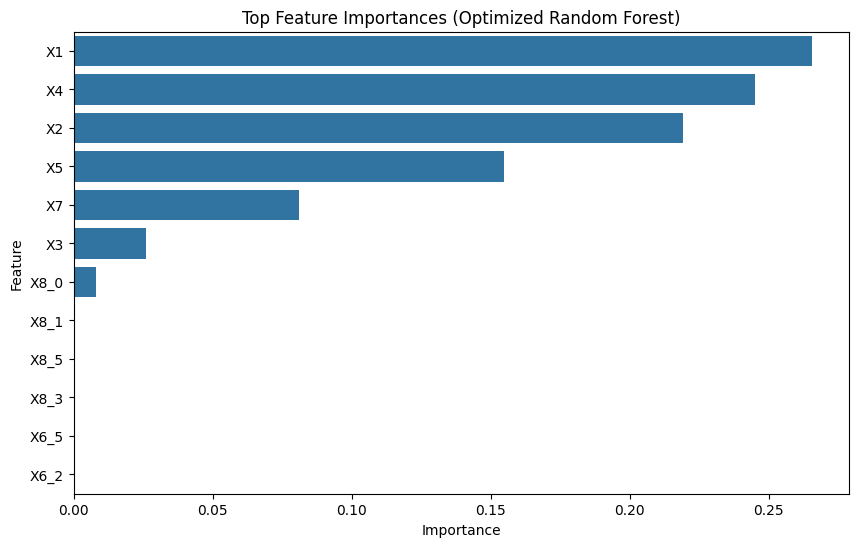

In [40]:
# top features
plt.figure(figsize=(10,6))
sns.barplot(data=fi.head(12), x="Importance", y="Feature")
plt.title("Top Feature Importances (Optimized Random Forest)")
plt.show()


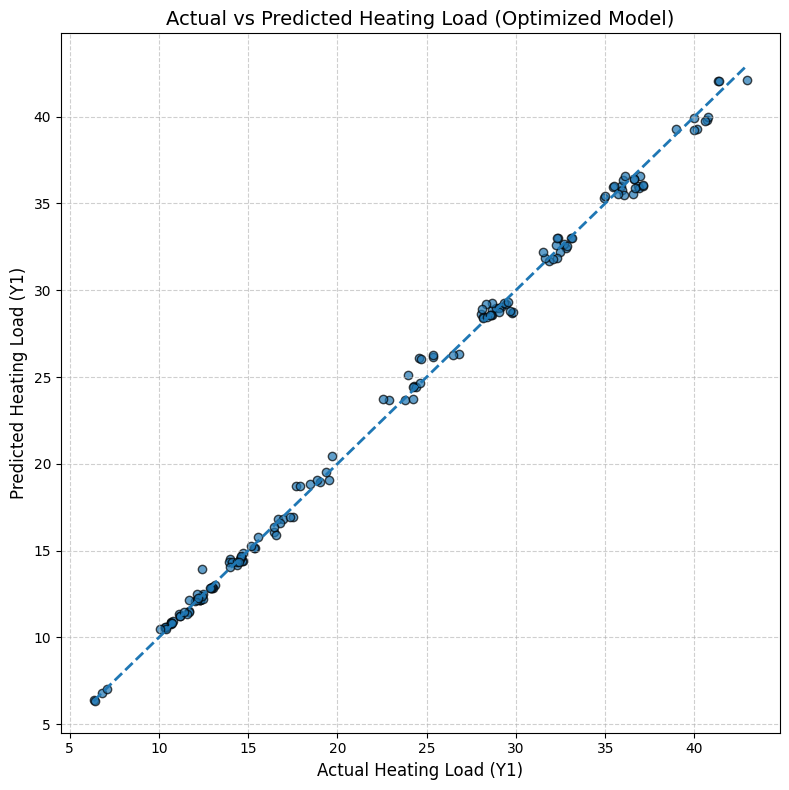

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Generate predictions
best_preds = best_model.predict(X_test)

# Create plot
plt.figure(figsize=(8, 8))

# Scatter points
plt.scatter(
    y_test,
    best_preds,
    alpha=0.7,
    edgecolor="black"
)

# Perfect prediction reference line
min_val = min(y_test.min(), best_preds.min())
max_val = max(y_test.max(), best_preds.max())
plt.plot(
    [min_val, max_val],
    [min_val, max_val],
    linestyle="--",
    linewidth=2
)

# Labels and title
plt.xlabel("Actual Heating Load (Y1)", fontsize=12)
plt.ylabel("Predicted Heating Load (Y1)", fontsize=12)
plt.title("Actual vs Predicted Heating Load (Optimized Model)", fontsize=14)

# Grid for readability
plt.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


Since most dots lie very close to the line, the model's predictions are very accurate. The small gaps away from the line are small negligible prediction errors

#Problem Definition

Energy efficiency in buildings is a critical factor for reducing energy consumption and minimizing environmental impact. Heating load, in particular, is influenced by multiple building characteristics such as overall dimensions, roof and wall areas, building height, glazing area, and orientation. Predicting heating load accurately allows architects, engineers, and policymakers to make informed decisions regarding building design, insulation, and energy management strategies.

The challenge lies in the complex, non-linear relationships between these building features and heating load. Traditional linear models may fail to capture these relationships adequately, making advanced machine learning models necessary for precise predictions.

#Project Objective:
The primary goal of this project was to develop a predictive model for estimating heating load (Y1) of buildings based on key architectural and design features, including compactness, surface area, roof area, wall area, height, orientation, and glazing distribution (X1–X8). Specifically, we aimed to:

Identify which building parameters most strongly influence heating load.

Compare multiple regression models (linear and tree-based) to find the most accurate predictive model.

Optimize the best-performing model to ensure maximum accuracy and generalization.

#**Business / Real-World Implications:**

Energy Management: Accurate heating load predictions allow facility managers to design HVAC systems(system in a building that controls the indoor climate) more efficiently, reducing energy waste and operational costs.

Cost Optimization: Predictive insights into energy demand help developers and architects plan budgets and select materials that optimize thermal performance.

Sustainability: By identifying high-impact features (e.g., roof area, building height), businesses can make design adjustments that reduce carbon footprint and improve energy efficiency.

Decision Support: The model provides a data-driven tool for architects, engineers, and building planners to make informed decisions without relying solely on manual calculations.

Our Gradient Boosting model achieved R² ≈ 0.998 and RMSE ≈ 0.49, demonstrating extremely high predictive accuracy. This means it can be reliably used to predict heating load for new building designs, providing actionable insights for energy efficiency and cost savings.